## Time vs. Movie Budget
#### Hypothesis:
The budget (in USD, regardless of country) that is spent on movie productions will remain relatively constant over the years.

In [68]:
yearVbudget <- imdb_movies %>%
    separate(budget, into = c("budget_form", "budget"), sep = " ") %>%
    na.omit(budget_form) %>%
    filter(budget_form == "$") %>%
    mutate(budget = as.integer(budget)) %>%
    group_by(year) %>%
    summarize(avg_budget = mean(budget, na.rm = TRUE)) %>%
    mutate(years_since_1894 = year - 1894) %>%
    mutate(avg_budget_in_millions = avg_budget / 1000000) %>%
    print(width = Inf)

# A tibble: 80 x 4
    year avg_budget years_since_1894 avg_budget_in_millions
 * <dbl>      <dbl>            <dbl>                  <dbl>
 1  1931   1500000                37                  1.5  
 2  1936   1500000                42                  1.5  
 3  1937    779500                43                  0.780
 4  1939   2884667.               45                  2.88 
 5  1940   2440000                46                  2.44 
 6  1941    839727                47                  0.840
 7  1942    950000                48                  0.95 
 8  1946   2100000                52                  2.1  
 9  1948   3000000                54                  3    
10  1950   1516667.               56                  1.52 
# … with 70 more rows


60% / 20% / 20% split

In [20]:
#this is training set
yearVbudget_train <- yearVbudget %>%
    sample_frac(0.60)
#yearVbudget_train
#68 rows

yearVbudget_valid_test <- anti_join(yearVbudget, yearVbudget_train, by = "year")
#yearVbudget_valid_test
#45 rows

#this is validation set
yearVbudget_valid <- yearVbudget_valid_test %>%
    sample_frac(0.50)
#yearVbudget_valid
#22 rows

#this is test set
yearVbudget_test <- anti_join(yearVbudget_valid_test, yearVbudget_valid, by = "year")
#yearVbudget_test
#23 rows

In [21]:
RMSE_timeBudget <- function(a, data) {
    totalPredict <- a[1] + (a[2] * data$years_since_1894)
    diff <- totalPredict - data$avg_budget_in_millions
    sq_diff <- diff ** 2
    sqrt(mean(sq_diff))
}

best_yearVbudget <- optim(c(-15, 1/100), RMSE_timeBudget, data = mutate(yearVbudget_train, x = years_since_1894, y = avg_budget_in_millions))
best_yearVbudget

a_yearVbudget <- best_yearVbudget$par

$par
[1] -37.5887241   0.6321051

$value
[1] 5.315396

$counts
function gradient 
      87       NA 

$convergence
[1] 0

$message
NULL

[1] "Error: Root Mean Squared Error"
[1] 5.315396


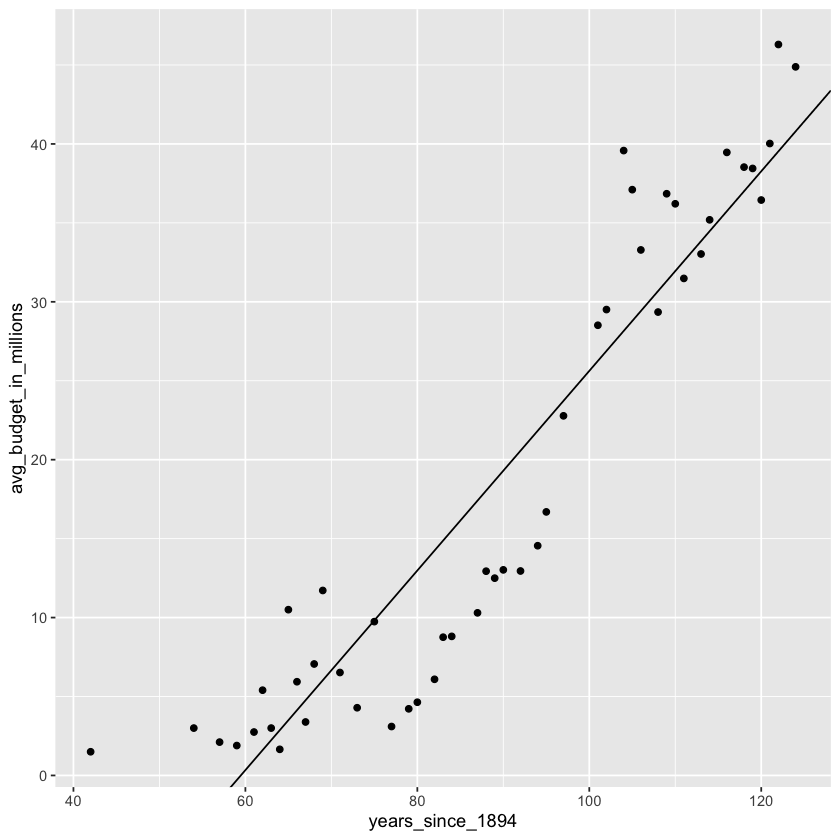

In [22]:
print("Error: Root Mean Squared Error")
print(RMSE_timeBudget(a_yearVbudget, yearVbudget_train))

ggplot(data = yearVbudget_train) +
    geom_point(mapping = aes(x = years_since_1894, y = avg_budget_in_millions)) +
    geom_abline(mapping = aes(intercept = a_yearVbudget[1], slope = a_yearVbudget[2]))

[1] "Error: Root Mean Squared Error"
[1] 7.135433


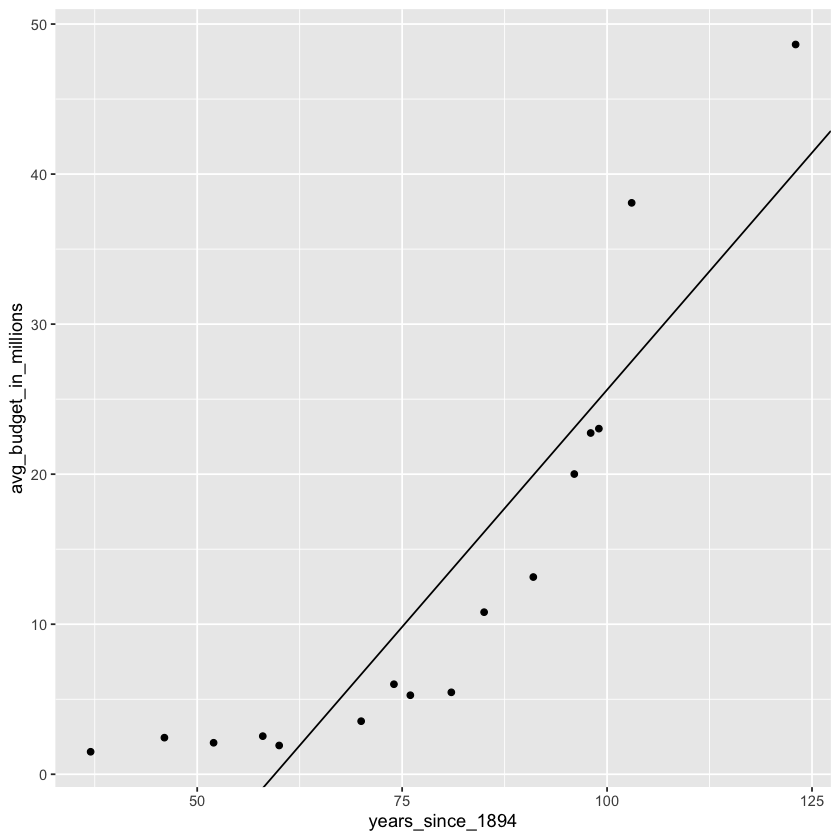

In [23]:
print("Error: Root Mean Squared Error")
print(RMSE_timeBudget(a_yearVbudget, yearVbudget_valid))

ggplot(data = yearVbudget_valid) +
    geom_point(mapping = aes(x = years_since_1894, y = avg_budget_in_millions)) +
    geom_abline(mapping = aes(intercept = a_yearVbudget[1], slope = a_yearVbudget[2]))

[1] "Error: Root Mean Squared Error"
[1] 6.765486


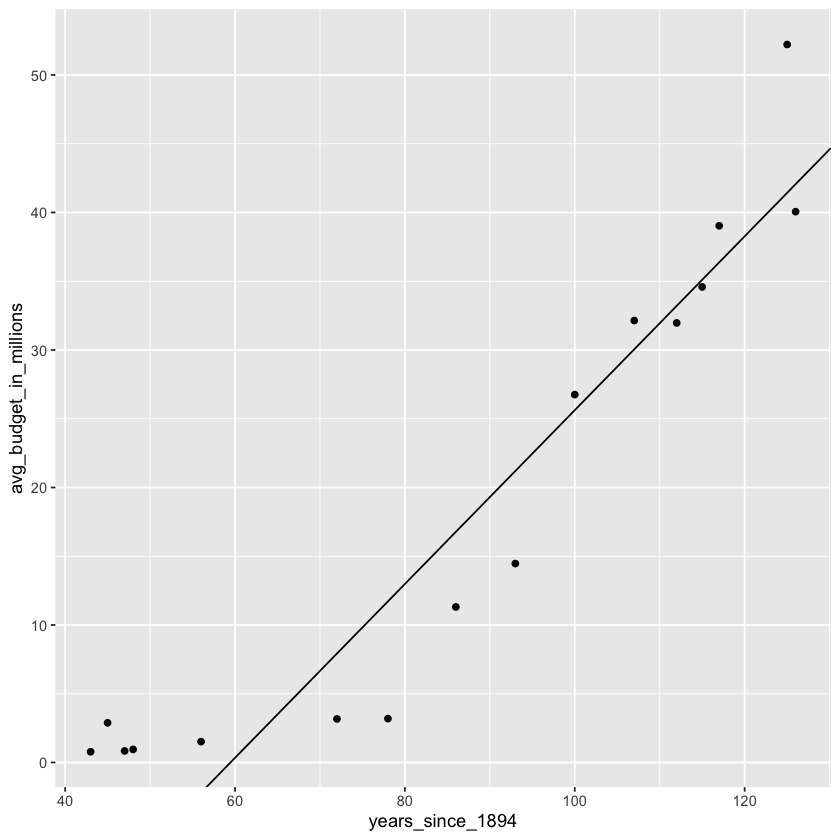

In [24]:
print("Error: Root Mean Squared Error")
print(RMSE_timeBudget(a_yearVbudget, yearVbudget_test))

ggplot(data = yearVbudget_test) +
    geom_point(mapping = aes(x = years_since_1894, y = avg_budget_in_millions)) +
    geom_abline(mapping = aes(intercept = a_yearVbudget[1], slope = a_yearVbudget[2]))

Training RMSE: 5.315396  
Validation RMSE: 7.135433  
Test RMSE: 6.765486 


In comparison to the test and the training dataset, the validation dataset had the lowest RMSE score.  The RMSE score overall isn't as low as we'd like it to be, but it's an adequate model for predicting that as the years increase, so will the budget of a movie.

Hypothesis: The budget (in USD, regardless of country) that is spent on movie productions will remain relatively constant over the years.  
Post-modeling: As per the graphs, it is seen that the budget for movie productions have actually increased.  We are not sure if the original dataset considered inflation.  But if not, the increase in budget is probably due to better technology, post-production work, quality, and set props, not to mention all the people working to put the movie together as well.